##Assignment 3

1.Download the data set /content/Flowers-Dataset.zip

importing libraries


In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout,Conv2D,Flatten,MaxPool2D,Reshape,InputLayer
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

#DataSet Augmentation

1.dataset consists of 5 different classes  
2.daisy  
3.dandelion  
4.rose  
5.sunflower  
6.tulip


#Unzip the dataset

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip gdrive/MyDrive/Flowers-Dataset.zip

In [64]:
pictures = 'flowers/'

In [10]:
train_data = ImageDataGenerator(rescale = 1./255,
                             shear_range = 0.2,
                             zoom_range = 0.2,
                             horizontal_flip = True,
                             validation_split = 0.30)
test_data = ImageDataGenerator(rescale = 1./255,validation_split = 0.30)

In [65]:
training_set = train_data.flow_from_directory(pictures,
                                                 target_size=(64,64),
                                                 batch_size=100,
                                                 class_mode='categorical',
                                                 shuffle=True,
                                                 color_mode='rgb',
                                                 subset = 'training')

testing_set = test_data.flow_from_directory(pictures,
                                                 target_size=(64,64),
                                                 batch_size=100,
                                                 class_mode='categorical',
                                                 shuffle=True,
                                                 color_mode='rgb',
                                                 subset = 'validation')

Found 3024 images belonging to 5 classes.
Found 1293 images belonging to 5 classes.


#Model Build Using CNN

1.Create the model

In [58]:
Model = Sequential()

In [59]:
#convolution layer and Pooling layer 1
Model.add(Conv2D(filters=48,kernel_size=3,activation='relu',input_shape=(64,64,3)))
Model.add(MaxPool2D(pool_size=2,strides=2))
Model.add(Dropout(0.4))

#convolution layer and Pooling layer 2
Model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
Model.add(MaxPool2D(pool_size=2,strides=2))
Model.add(Dropout(0.4))

#Flattening the images
Model.add(Flatten())

#Fully Connected layers
Model.add(Dense(64,activation='relu'))
Model.add(Dropout(0.4))
Model.add(Dense(5,activation='softmax'))

In [60]:
Model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 62, 62, 48)        1344      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 31, 31, 48)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 31, 31, 48)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 29, 29, 32)        13856     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_13 (Dropout)        (None, 14, 14, 32)       

2.Compile the model

In [61]:
Model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

3.

In [32]:
early_stop = EarlyStopping(monitor='val_accuracy', 
                           patience=5,verbose=1,mode='auto')

lr = ReduceLROnPlateau(monitor='val_accuracy', 
                       factor=0.2,patience=5, 
                       min_lr=0.00001)

callback = [early_stop,lr]

4.Training the models

In [46]:
Result = Model.fit(x=training_set, validation_data=testing_set, epochs=40)

Epoch 1/40
31/31 [==============================] - 33s 1s/step - loss: 0.9899 - accuracy: 0.6088 - val_loss: 1.0125 - val_accuracy: 0.6009
Epoch 2/40
31/31 [==============================] - 32s 1s/step - loss: 0.9779 - accuracy: 0.6197 - val_loss: 0.9968 - val_accuracy: 0.6203
Epoch 3/40
31/31 [==============================] - 40s 1s/step - loss: 0.9759 - accuracy: 0.6200 - val_loss: 1.0421 - val_accuracy: 0.6009
Epoch 4/40
31/31 [==============================] - 40s 1s/step - loss: 0.9698 - accuracy: 0.6095 - val_loss: 1.0045 - val_accuracy: 0.6094
Epoch 5/40
31/31 [==============================] - 37s 1s/step - loss: 0.9501 - accuracy: 0.6250 - val_loss: 1.0402 - val_accuracy: 0.6071
Epoch 6/40
31/31 [==============================] - 33s 1s/step - loss: 0.9265 - accuracy: 0.6346 - val_loss: 0.9266 - val_accuracy: 0.6442
Epoch 7/40
31/31 [==============================] - 36s 1s/step - loss: 0.9176 - accuracy: 0.6366 - val_loss: 0.9737 - val_accuracy: 0.6156
Epoch 8/40
31/31 [==

5.Plot loss and accuracy

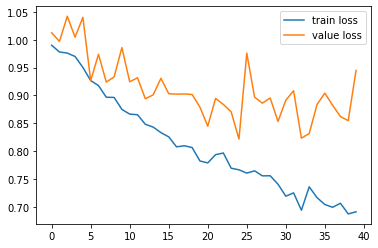

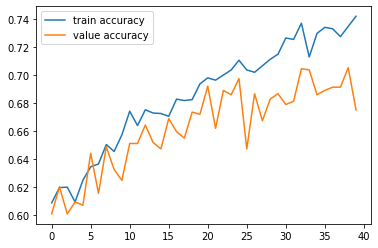

In [47]:
#Loss
plt.plot(Result.history['loss'], label='train loss')
plt.plot(Result.history['val_loss'], label='value loss')
plt.legend()
plt.show()

#Accuracy
plt.plot(Result.history['accuracy'], label='train accuracy')
plt.plot(Result.history['val_accuracy'], label='value accuracy')
plt.legend()
plt.show()

6.Save the model

In [62]:
Model.save('flower.h5')

#Test The Model

In [35]:
training_set.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [36]:
classes = ['Daisy','Dandelion','Rose','Sunflower','Tulip'] 
def testing(img):
    img = image.load_img(img,target_size=(64,64)) 
    x = image.img_to_array(img) 
    x = np.expand_dims(x,axis=0) 
    pred = np.argmax(model.predict(x)) 
    return print("Predicted class as:",classes[pred])

def img_show(img):
    img1 = image.load_img(img,target_size=(64,64)) 
    plt.imshow(img1)

Predicted class as: Daisy


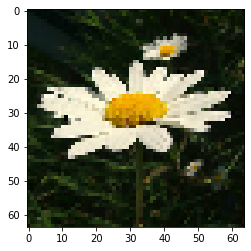

In [50]:
#Image1
img_show('/content/flowers/daisy/162362897_1d21b70621_m.jpg')
testing('/content/flowers/daisy/162362897_1d21b70621_m.jpg')

Predicted class as: Daisy


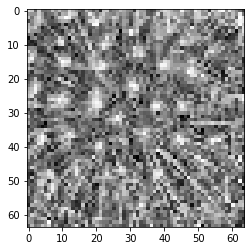

In [51]:
#Image2
img_show('/content/flowers/dandelion/17570530696_6a497298ee_n.jpg')
testing('/content/flowers/dandelion/17570530696_6a497298ee_n.jpg')

Predicted class as: Daisy


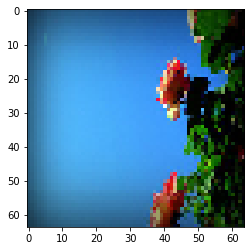

In [52]:
#Image3
img_show('/content/flowers/rose/18490508225_0fc630e963_n.jpg')
testing('/content/flowers/rose/18490508225_0fc630e963_n.jpg')

Predicted class as: Sunflower


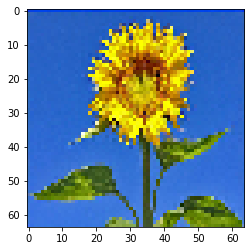

In [53]:
#Image4
img_show('/content/flowers/sunflower/14925398301_55a180f919_n.jpg')
testing('/content/flowers/sunflower/14925398301_55a180f919_n.jpg')

Predicted class as: Tulip


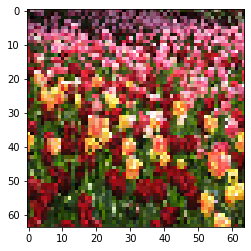

In [54]:
#Sample5
img_show('/content/flowers/tulip/3502085373_edc2c36992_n.jpg')
testing('/content/flowers/tulip/3502085373_edc2c36992_n.jpg')